# Лабораторная работа Математической статистике №1 
# «Первичная обработка выборки из дискретной генеральной совокупности»

Работу выполнял студент группы КМБО-03-19 Успенсккий Артём.

Задание 1 Получить выборку, сгенерировав 200 псевдослучайных чисел,
распределенных по биномиальному закону с параметрами n и p.



In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import statistics 
import cmath
from matplotlib import ticker
from math import factorial
from math import exp
from math import log

In [25]:
def Binomial(n,p,size):
    distr = sps.binom(n, p).rvs(size)
    distr.sort()
    print (
        '\nПараметр n = ', n,
       '\nПараметр p = ', p,)
    print ('Биномиальное распределение:\n',distr)
    return (distr)

def Geomerty(p,size):
    distr = sps.geom(p).rvs(size)
    for i in range(size):
        distr[i]=distr[i]-1
    distr.sort()
    print (
       '\nПараметр p = ', p,)
    print ('Геометрическое распределение:\n',distr)
    return (distr)

def Poisson(l,size):
    distr = sps.poisson(l).rvs(size)
    distr.sort()
    print (
       '\nПараметр l = ', l,)
    print ('Распределение Пуассона:\n',distr)
    return (distr)


def Xi(distr, size):
    xi = []
    for i in range(size):
        if distr[i]!=distr[i-1]:
            xi.append(distr[i])
    return(xi)

def Freq(distr, xi, size):
    ni=[]
    for j in range(len(xi)):
        help = 0
        for i in range(size):
            if distr[i]==xi[j]:
                help += 1
        ni.append(help)  
    return(ni)

def Rel_freq(distr, ni, size):
    wi = []
    for i in range(len(ni)):
        wi.append(ni[i]/size)
    return(wi)

def koef_srfq(wi, k):
    S=0
    for i in range (k+1):
        S = S + wi[i]
    return(S)  

def Sum_rfq(wi, k):
    sk = []
    for i in range (len(wi)):
        sk.append(koef_srfq(wi,i))
    return(sk)
    

In [3]:
def Mean(xi ,wi):
    X = 0
    for i in range (len(xi)):
        help = xi[i]*wi[i]
        X += help
    return (X)

def Moment(xi,wi):
    M = []
    for i in range (len(xi)):
        help = 0
        for j in range (len(xi)):
            help += pow(xi[j],i+1)*wi[j]
        M.append(help)
    return (M)
    
def Disp(M):
    D = M[1]- pow(M[0], 2)
    return (D)

def RMS(D):
    SD = pow(D, 1/2)
    return (SD)

def Mode(xi,wi):
    max_w = max(wi)
    flag = 0
    mode = 0
    for k in range(len(xi)):
        if (wi[k] == max_w):
            if flag > 0 and wi[k] == wi[k-1]:
                print("Выборочная мода не существует!")
                break
            mode += xi[k]
            flag += 1
    mode = mode/flag
    return(round(mode, 5))

def Median(xi,sk):
    for k in range(len(xi)):
        if k == 0:
            if sk[k] > 0.5:
                md = round(xi[k], 5)
                return (md)
            if sk[k] == 0.5:
                md = (round(xi[k]+xi[k+1])/2, 5)
                return (md)
        if (sk[k] > 0.5) and (sk[k-1] < 0.5):
            md = round(xi[k], 5)
            return (md)
        if sk[k] == 0.5:
            md= (round(xi[k]+xi[k+1])/2, 5)
            return (md)

def Asym_coef(M, sd):
    asym = (M[2]-3*M[1]*M[0]+2*pow(M[0], 3))/(pow(sd, 3))
    return (asym)

def Exe_coef(M, sd):
    help = M[3]-4*M[2]*M[0]+6*M[1]*pow(M[0], 2)-3*pow(M[0], 4)
    exe = help/(pow(sd, 4))-3
    return(exe)
    

# БИНОМИНАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

In [116]:
v = 46
n = 5 + v%16
p = 0.25 + 0.005*v
l = round(0.8 + v * 0.02, 5)
size=200
xi = []
ni = []
wi = []
sk = []
#xi - значение
#ni - кол-во значения
#sum(ni) = size 
#wi = ni/size
#sk = sum(wj)

distr1 = Binomial(n,p,size)
xi = Xi(distr1, size)
ni = Freq(distr1, xi, size)
wi= Rel_freq(distr1, ni, size)
sk = Sum_rfq(wi, size)

#Distr2 = Geomerty(p,size)
#Distr3 = Poisson(l,size)

In [117]:
Table = pd.DataFrame({'Xi':xi, 'Ni':ni, 'Wi':wi, 'Si':sk})
Table

,Xi,Ni,Wi,Si
0,2,1,0.005,0.005
1,3,1,0.005,0.010
2,4,1,0.005,0.015
3,5,5,0.025,0.040
4,6,12,0.060,0.100
5,7,22,0.110,0.210
6,8,34,0.170,0.380
7,9,39,0.195,0.575
8,10,36,0.180,0.755
9,11,14,0.070,0.825


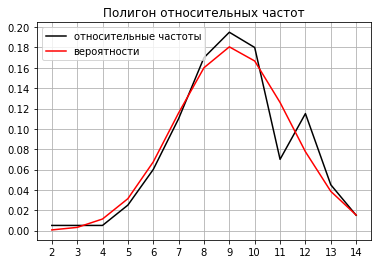

In [118]:
# полигон относительных частот
fig, fir = plt.subplots()
fir.xaxis.set_major_locator(ticker.MultipleLocator(1))
fir.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
pi = [i for i in range(len(xi))]

for k in range(len(xi)):
    pi[k] = (factorial(n)/(factorial(xi[k])*factorial(n-
xi[k])))*p**xi[k]*(1-p)**(n-xi[k])
fir.plot(xi, wi, 'black',label='относительные частоты')
fir.plot(xi, pi, 'red',label='вероятности')
plt.title("Полигон относительных частот")
plt.grid(True)
plt.legend(loc='best')

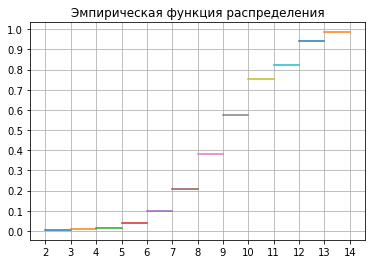

In [119]:
# график функции эмпирического распределения
fig, sec = plt.subplots()
sec.xaxis.set_major_locator(ticker.MultipleLocator(1))
sec.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
for k in range(len(xi) - 1):
    sec.plot([xi[k], xi[k+1]], [sk[k], sk[k]])
plt.title("Эмпирическая функция распределения")
plt.grid(True)
plt.show()

In [120]:
#Выборочное среднее (теор/эксп)
X_teor = n*p
X = Mean(xi,wi)
print (X_teor, '\n', X,'\n')

#Выборочный момент
M = Moment(xi,wi)

#Выборочная дисперсия (теор/эксп)
D_teor = n*p*(1-p)
D = Disp(M)
print (D_teor, '\n', D,'\n')

#Выборочное среднеквадратическое откл.(теор/эксп)
SD_teor = pow(D_teor, 1/2)
SD = RMS(D)
print (SD_teor, '\n', SD,'\n')

#Выборочная мода (теор/эксп)
mode_teor = (n+1)*p
if int(mode_teor) == float(mode_teor):
        mode_teor = round(mode_teor - 0.5, 5)
mode = Mode(xi,wi)
print (mode_teor, '\n', mode,'\n')

#Выборочная медиана (теор/эксп)
median_teor = round(n*p)
median = Median(xi,sk)
print (median_teor, '\n', median,'\n')

#Выборочный коэф.асимметрии (теор/эксп)
asym_teor = ((1-p)-p)/(SD_teor)
asym = Asym_coef(M, SD)
print (asym_teor, '\n', asym,'\n')

#Выборочный коэф. эксцесса (теор/эксп)
exe_teor = (1-6*p*(1-p))/(D_teor)
exe = Exe_coef(M, SD)
print (exe_teor, '\n', exe,'\n')



9.12 
 9.16 

4.7424 
 4.6644000000000005 

2.177705214210592 
 2.1597222043586997 

9.6 
 9.0 

9 
 9 

0.018367958959266142 
 -0.13232413868897094 

-0.10492577597840756 
 0.054058739001653144 



In [121]:
#теоретические вероятности
wj = wi
for i in range (len(wi)):
    wj[i]=abs(wi[i]-pi[i])
print(wj)
print(sum(wj))

[0.0044144885033865, 0.0019373244792524657, 0.006308340384298588, 0.006315404141134552, 0.007448562765520569, 0.0056261075980352515, 0.009902312556566595, 0.014376968012536684, 0.013271047396187702, 0.05592116700148059, 0.03751005107601196, 0.006484285741923092, 0.00023698586033811184]
0.16975304551667264


# ГЕОМЕТРИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ

In [134]:
xi2 = []
ni2 = []
wi2 = []
sk2 = []
#xi - значение
#ni - кол-во значения
#sum(ni) = size 
#wi = ni/size
#sk = sum(wj)

distr2 = Geomerty(p,size)
xi2 = Xi(distr2, size)
ni2 = Freq(distr2, xi2, size)
wi2= Rel_freq(distr2, ni2, size)
sk2 = Sum_rfq(wi2, size)

#Distr2 = Geomerty(p,size)
#Distr3 = Poisson(l,size)

In [135]:
Table2 = pd.DataFrame({'Xi':xi2, 'Ni':ni2, 'Wi':wi2, 'Si':sk2})
Table2

,Xi,Ni,Wi,Si
0,0,87,0.435,0.435
1,1,58,0.290,0.725
2,2,19,0.095,0.820
3,3,18,0.090,0.910
4,4,7,0.035,0.945
5,5,3,0.015,0.960
6,6,4,0.020,0.980
7,7,1,0.005,0.985
8,9,2,0.010,0.995
9,10,1,0.005,1.000


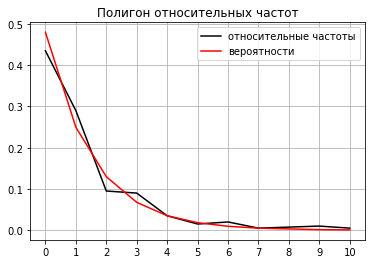

In [136]:
fig, fir = plt.subplots()
fir.xaxis.set_major_locator(ticker.MultipleLocator(1))
fir.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
pi2 = [i for i in range(len(xi2))]
for k in range(len(xi2)):
    pi2[k] = ((1-p)**(xi2[k]))*p
fir.plot(xi2, wi2, 'black',label='относительные частоты')
fir.plot(xi2, pi2, 'red',label='вероятности')
plt.title("Полигон относительных частот")
plt.grid(True)
plt.legend(loc='best')

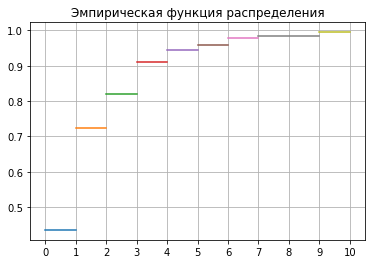

In [137]:
fig, sec = plt.subplots()
sec.xaxis.set_major_locator(ticker.MultipleLocator(1))
sec.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
for k in range(len(xi2) - 1):
    sec.plot([xi2[k], xi2[k+1]], [sk2[k], sk2[k]])
plt.title("Эмпирическая функция распределения")
plt.grid(True)
plt.show()

In [138]:
#Выборочное среднее (теор/эксп)
X_teor2 = (1-p)/p
X2 = Mean(xi2,wi2)
print (X_teor2, '\n', X2,'\n')

#Выборочный момент
M2 = Moment(xi2,wi2)

#Выборочная дисперсия (теор/эксп)
D_teor2 = (1-p)/pow(p,2)
D2 = Disp(M2)
print (D_teor2, '\n', D2,'\n')

#Выборочное среднеквадратическое откл.(теор/эксп)
SD_teor2 = pow((1-p), 1/2)/p
SD2 = RMS(D2)
print (SD_teor2, '\n', SD2,'\n')

#Выборочная мода (теор/эксп)
mode_teor2 = 0
mode2 = Mode(xi2,wi2)
print (mode_teor2, '\n', mode2,'\n')

#Выборочная медиана (теор/эксп)
median_teor2 = log(2) / log(1-p)
if int(median_teor2) == float(median_teor2):
    mode_teor2 = round(-median_teor2 - 0.5, 5)
else:
    mode_teor2 = int(-median_teor2)
median2 = Median(xi2,sk2)
print (median_teor2, '\n', median2,'\n')

#Выборочный коэф.асимметрии (теор/эксп)
asym_teor2 = (2 - p) / pow(1-p, 0.5)
asym2 = Asym_coef(M2, SD2)
print (asym_teor2, '\n', asym2,'\n')

#Выборочный коэф. эксцесса (теор/эксп)
exe_teor2 = (6 + (pow(p, 2) / (1-p)))
exe2 = Exe_coef(M2, SD2)
print (exe_teor2, '\n', exe2,'\n')

1.0833333333333335 
 1.26 

2.2569444444444446 
 3.1023999999999994 

1.502313031443329 
 1.7613631085043195 

0 
 0.0 

-1.0599772529606004 
 1 

2.1078607456558704 
 2.231248435235513 

6.443076923076923 
 6.085494093178726 



In [139]:
print (pi2)
print(sum(pi2))

[0.48, 0.2496, 0.12979200000000002, 0.06749184, 0.0350957568, 0.018249793536, 0.009489892638720002, 0.004934744172134401, 0.0013343548241451422, 0.0006938645085554739]
0.996682246479555


In [140]:
#теоретические вероятности
wj2 = wi2
for i in range (len(wi2)):
    wj2[i]=round(abs(wi2[i]-pi2[i]),5)
print(wj2)
print(sum(wj2))

[0.045, 0.0404, 0.03479, 0.02251, 0.0001, 0.00325, 0.01051, 7e-05, 0.00867, 0.00431]
0.16960999999999998


# РАСПРЕДЕЛЕНИЕ ПУАССОН

In [51]:
xi3 = []
ni3 = []
wi3 = []
sk3 = []
#xi - значение
#ni - кол-во значения
#sum(ni) = size 
#wi = ni/size
#sk = sum(wj)

distr3 = Poisson(l,size)
xi3 = Xi(distr3, size)
ni3 = Freq(distr3, xi3, size)
wi3= Rel_freq(distr3, ni3, size)
sk3 = Sum_rfq(wi3, size)

#Distr2 = Geomerty(p,size)
#Distr3 = Poisson(l,size)


Параметр l =  1.72
Распределение Пуассона:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 5 5 6]


In [52]:
Table3 = pd.DataFrame({'Xi':xi3, 'Ni':ni3, 'Wi':wi3, 'Si':sk3})
Table3

,Xi,Ni,Wi,Si
0,0,40,0.200,0.200
1,1,53,0.265,0.465
2,2,45,0.225,0.690
3,3,48,0.240,0.930
4,4,11,0.055,0.985
5,5,2,0.010,0.995
6,6,1,0.005,1.000


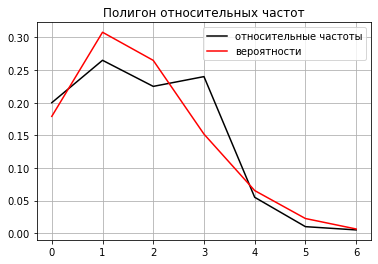

In [65]:
fig, fir = plt.subplots()
fir.xaxis.set_major_locator(ticker.MultipleLocator(1))
fir.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
pi3 = [i for i in range(len(xi3))]
for k in range(len(xi3)):
    pi3[k] = l**(xi3[k])/factorial(k)*exp((-1)*l)
fir.plot(xi3, wi3, 'black',label='относительные частоты')
fir.plot(xi3, pi3, 'red',label='вероятности')
plt.title("Полигон относительных частот")
plt.grid(True)
plt.legend(loc='best')

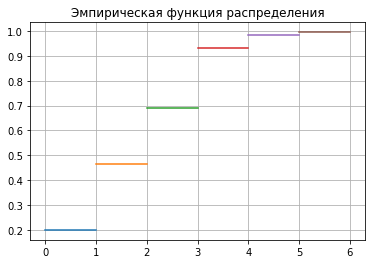

In [54]:
fig, sec = plt.subplots()
sec.xaxis.set_major_locator(ticker.MultipleLocator(1))
sec.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
for k in range(len(xi3) - 1):
    sec.plot([xi3[k], xi3[k+1]], [sk3[k], sk3[k]])
plt.title("Эмпирическая функция распределения")
plt.grid(True)
plt.show()

In [74]:
#Выборочное среднее (теор/эксп)
X_teor3 = l
X3 = Mean(xi3,wi3)
print (X_teor3, '\n', X3,'\n')

#Выборочный момент
M3 = Moment(xi3,wi3)

#Выборочная дисперсия (теор/эксп)
D_teor3 = l
D3 = Disp(M3)
print (D_teor3, '\n', D3,'\n')

#Выборочное среднеквадратическое откл.(теор/эксп)
SD_teor3 = pow(l, 1/2)
SD3 = RMS(D3)
print (SD_teor3, '\n', SD3,'\n')

#Выборочная мода (теор/эксп)
mode_teor3 = int(l)
mode3 = Mode(xi3,wi3)
print (mode_teor3, '\n', mode3,'\n')

#Выборочная медиана (теор/эксп)
median_teor3 = int(l+1/3-0.02/l)
median3 = Median(xi3,sk3)
print (median_teor3, '\n', median3,'\n')

#Выборочный коэф.асимметрии (теор/эксп)
asym_teor3 = pow(l, -1/2)
asym3 = Asym_coef(M3, SD3)
print (asym_teor3, '\n', asym3,'\n')

#Выборочный коэф. эксцесса (теор/эксп)
exe_teor3 = 1/l
exe3 = Exe_coef(M3, SD3)
print (exe_teor3, '\n', exe3,'\n')

1.72 
 1.735 

1.72 
 1.6247749999999996 

1.3114877048604001 
 1.2746666230822865 

1 
 1.0 

2 
 2 

0.7624928516630234 
 0.3453837289242395 

0.5813953488372093 
 -0.4454678455139356 



In [141]:
print (pi3)
print(sum(pi3))

[0.17906614791149322, 0.3079937744077683, 0.2648746459906807, 0.15186146370132364, 0.06530042939156917, 0.02246334771069979, 0.006439493010400607]
0.9979993021239355


In [142]:
#теоретические вероятности
wj3 = wi3
for i in range (len(wi3)):
    wj3[i]=round(abs(wi3[i]-pi3[i]),5)
print(wj3)
print(sum(wj3))

[0.02093, 0.04299, 0.03987, 0.08814, 0.0103, 0.01246, 0.00144]
0.21613
